In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
#%pylab inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import data

# we denote P the matrix of beads coordinates with minima below 100
S = np.loadtxt('/Users/paulvercoustre/Documents/Education/Centrale_ESSEC/Geometric_Methods_in_Data_Analysis/Project/Data/hybrid-TRRT-BH-BLN__minima_below_100.txt', delimiter=' ',
               usecols = (range(0,208)))

# we denote E the vector of corresponding energies
E_S = np.loadtxt('/Users/paulvercoustre/Documents/Education/Centrale_ESSEC/Geometric_Methods_in_Data_Analysis/Project/Data/hybrid-TRRT-BH-BLN__energies_below_100.txt', delimiter=' ')

In [8]:
# overview of data dimensionality
print "Dimension of conformation matrix:", S.shape

print "Dimension of energy vector:", E_S.shape

Dimension of conformation matrix: (666113, 208)
Dimension of energy vector: (666113,)


In [15]:
# find the index of the 10 lowest minima
idx = np.argpartition(E_S, 10)

# T is the corresponding matrix of coordinates
T = S[idx[0:10],]

print T.shape

(10, 208)


In [27]:
# export for distance computation with SBL
np.savetxt("10_local_minima.txt", T, fmt='%.5f', delimiter=" ")

In [ ]:
# We use the text file exported as an input for the "Conformationan Aanlysis" package in SBL. 
# We then import the output that was generated to permform the MDS

In [17]:
# import T_dist the matrix of pairwise distances between members of T (Least RMSD)
T_dist = np.loadtxt('/Users/paulvercoustre/Dropbox/GMDA/sbl-conf-ensemble-analysis-lrmsd__pairwise_distances.txt', delimiter=' ',
               usecols = (range(0,10)))

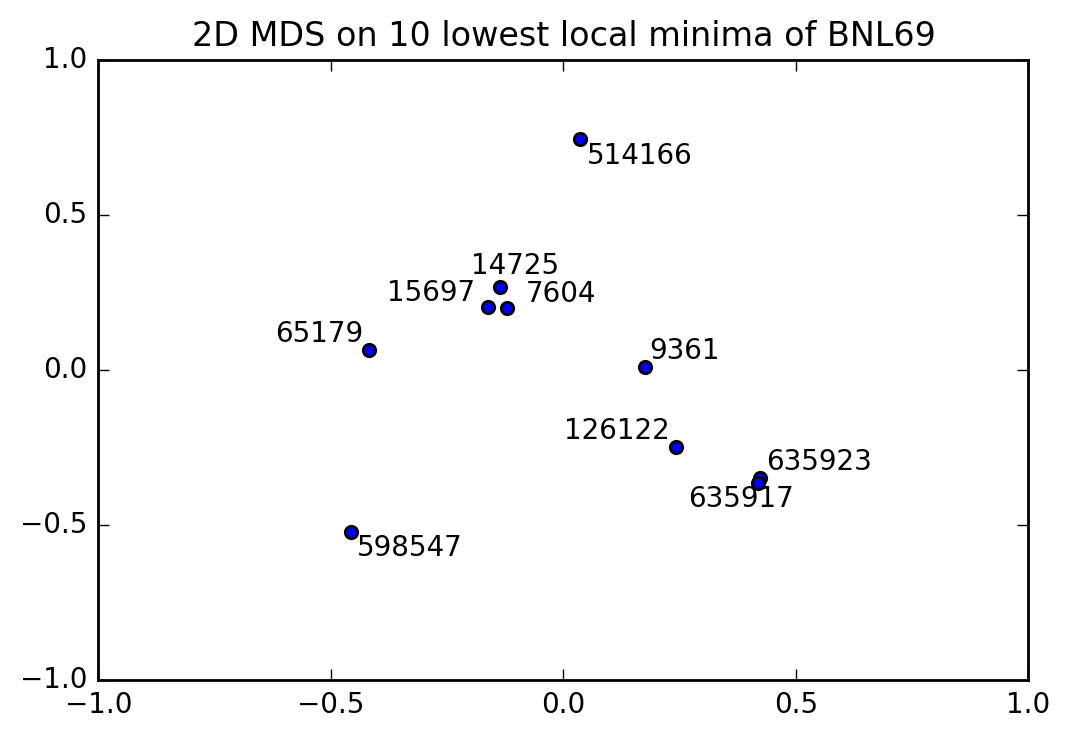

In [21]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from adjustText import adjust_text

seed = 1 #generate reproducable results

mds_lrmsd = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed, 
                         dissimilarity="precomputed", n_jobs=1)

T_dist_mds = mds_lrmsd.fit_transform(T_dist)

fig, ax = plt.subplots()
ax.scatter(T_dist_mds[:, 0], T_dist_mds[:, 1])

texts = []
for i, txt in enumerate(idx[0:10]):
    texts.append(ax.text(T_dist_mds[:, 0][i],T_dist_mds[:, 1][i], txt))
adjust_text(texts)

plt.xticks([-1,-0.5,0,0.5,1])
plt.yticks([-1,-0.5,0,0.5,1])
plt.title("2D MDS on 10 lowest local minima of BNL69")
plt.show()
#plt.savefig('MDS_Q1.png')